In [4]:
from carla_dataset import *

dataset = CarlaDataset('/data', transform=ToTensor())

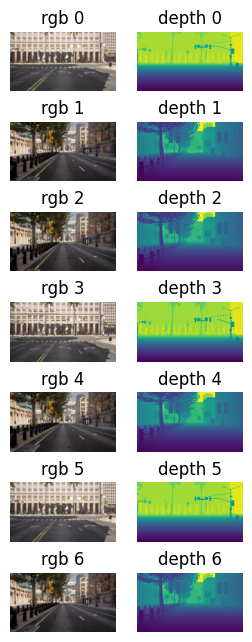

In [20]:
import matplotlib.pyplot as plt

def depth_to_gray(img):
    R = img[...,0]
    G = img[...,1]
    B = img[...,2]
    depth = R + G*256 + B*256*256
    normalized = depth / ( 256*256*256 - 1 )
    multiplied = np.log(normalized * 255)
    return multiplied

figure = plt.figure(figsize=(3, 8))
cols, rows = 2,7
for i in range(rows):
    imgs = dataset[i]
    figure.add_subplot(rows, cols, i*cols+1)
    plt.title('rgb {0}'.format(i))
    plt.axis("off")
    plt.imshow(imgs['rgb'].permute(1, 2, 0))
    figure.add_subplot(rows, cols, i*cols+2)
    plt.title('depth {0}'.format(i))
    plt.axis("off")
    plt.imshow(depth_to_gray(imgs['depth'].permute(1, 2, 0)))
plt.show()